# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='Reacher_Many/Reacher.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    # print(next_states.shape) <-- (20,33)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.09349999791011214


When finished, you can close the environment.

In [6]:
# env.close() #commented as we are just getting started :)

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

Implementation based on code: https://github.com/reinforcement-learning-kr/pg_travel
with only some adjustments

In [7]:
input_size = state_size
output_size = action_size
agent_number = states.shape[0]

import torch
import torch.optim as optim
torch.autograd.set_detect_anomaly(True)
device = torch.device('cpu')

In [8]:
#from korea_code.model import Actor, Critic
from collections import deque
import importlib
import Code.my_model as my_model
import Code.ppo as ppo
importlib.reload(my_model)
importlib.reload(ppo)

from Code.running_state import ZFilter
from Code.memory import Memory
from Code.utils import to_tensor, get_action, save_networks

In [9]:
class artificial_args:
    pass

args = artificial_args()

args.actor_lr = 0.0005
args.critic_lr = 0.0005
args.l2_rate = 0.0001
args.gamma = 0.995
args.lamda = 0.95
args.clip_param = 0.1

args.batch_size = 2048
args.input_size = input_size
args.output_size = output_size
args.agent_number = agent_number
args.device = device
args.hidden_size = 256
args.episodes = 2000
args.activation = "elu"

args.scores_window_len = 100

actor = my_model.Actor(input_size, output_size, args.hidden_size).to(device)
critic = my_model.Critic(input_size, args.hidden_size).to(device)

In [10]:
running_state = ZFilter((agent_number,input_size), clip=5)
states = running_state(env_info.vector_observations)

actor_optim = optim.Adam(actor.parameters(), lr=args.actor_lr, weight_decay=args.l2_rate)
critic_optim = optim.Adam(critic.parameters(), lr=args.critic_lr, weight_decay=args.l2_rate)

In [11]:
scores = []
scores_window = deque(maxlen=args.scores_window_len)
score_avg = 0
learning_in_progress = True
checkpoint_foler = "Checkpoints"
mean_score_for_solved = 32.0 # just to be sure and learn a bit longer
number_episode_to_give_up = args.episodes
env_info = env.reset(train_mode=True)[brain_name]
ep = 0

while learning_in_progress or ep>number_episode_to_give_up:
    actor.eval(), critic.eval()
    memory = [Memory() for _ in range(agent_number)]
    ep += 1
    steps = 0
    score = np.zeros(agent_number)
    
    while True:
        steps += 1
        
        mu, std, _ = actor(to_tensor(states))
        actions = get_action(mu, std)
        env_info = env.step(actions)[brain_name]
        
        
        next_states = running_state(env_info.vector_observations)
        rewards = env_info.rewards
        dones = env_info.local_done
        masks = list(~(np.array(dones)))
        
        for i in range(agent_number):
            memory[i].push(states[i], actions[i], rewards[i], masks[i])
        
        score += np.array(rewards)
        states = next_states
                
        if np.any(dones):# exit loop if episode finished
            scores.append(score)
            scores_window.append(score)
            score = 0
            episodes = len(scores)
            if len(scores) % 1 == 0:
                print('{}th episode - mean in window: {} mean in episode: {} unformated: {}'.format(
                    episodes, np.mean(scores_window), np.mean(scores[-1]), scores[-1]))
            if len(scores) % 100 == 0:
                checkpoint_name = checkpoint_foler+"/traning_"+str(episodes)+".pth"
                save_networks(actor, critic, running_state, args, checkpoint_name)
                print("saved checkpoint as:", checkpoint_name)
            if(np.mean(scores_window)>=mean_score_for_solved):
                print("Environment is solved! Noice!")
                learning_in_progress = False
            break
            
    actor.train(), critic.train()
    sts, ats, returns, advants, old_policy, old_value = [], [], [], [], [], []
    
    for i in range(agent_number):
        batch = memory[i].sample()
        st, at, rt, adv, old_p, old_v = ppo.process_memory(actor, critic, batch, args)
        sts.append(st)
        ats.append(at)
        returns.append(rt)
        advants.append(adv)
        old_policy.append(old_p)
        old_value.append(old_v)
        
    sts = torch.cat(sts)
    ats = torch.cat(ats)
    returns = torch.cat(returns)
    advants = torch.cat(advants)
    old_policy = torch.cat(old_policy)
    old_value = torch.cat(old_value)
    
    ppo. train_model(actor, critic, actor_optim, critic_optim, sts, ats, returns, advants,
                    old_policy, old_value, args)
    

1th episode - mean in window: 0.052999998815357684 mean in episode: 0.052999998815357684 unformated: [0.         0.         0.         0.         0.         0.65999999
 0.         0.         0.         0.         0.         0.
 0.23999999 0.         0.         0.         0.16       0.
 0.         0.        ]
2th episode - mean in window: 0.08424999811686576 mean in episode: 0.11549999741837383 unformated: [0.         0.08       0.         0.         0.67999998 0.21
 0.14       0.         0.         0.02       0.         0.
 0.         0.26999999 0.         0.         0.15       0.48999999
 0.         0.26999999]
3th episode - mean in window: 0.09366666457305352 mean in episode: 0.11249999748542905 unformated: [0.         0.         0.29999999 0.         0.2        0.18
 0.03       0.36999999 0.         0.17       0.19       0.11
 0.29999999 0.         0.         0.         0.         0.31999999
 0.         0.08      ]
4th episode - mean in window: 0.1177499973680824 mean in episode: 0.

27th episode - mean in window: 0.7413147982451375 mean in episode: 1.4749999670311809 unformated: [1.77999996 2.30999995 1.03999998 0.26999999 2.15999995 0.57999999
 1.82999996 0.13       0.37999999 1.11999997 0.72999998 1.44999997
 1.49999997 2.56999994 1.37999997 1.96999996 2.96999993 1.42999997
 1.04999998 2.84999994]
28th episode - mean in window: 0.7639642686383533 mean in episode: 1.3754999692551793 unformated: [0.94999998 0.47999999 1.15999997 1.06999998 1.29999997 2.04999995
 1.72999996 2.04999995 0.99999998 1.93999996 1.73999996 2.06999995
 2.87999994 0.84999998 1.61999996 1.37999997 0.56999999 0.45999999
 0.87999998 1.32999997]
29th episode - mean in window: 0.7828103273304116 mean in episode: 1.3104999707080425 unformated: [1.33999997 1.65999996 2.51999994 1.05999998 1.35999997 1.60999996
 1.18999997 1.09999998 0.         1.30999997 1.41999997 0.37999999
 0.79999998 0.76999998 0.68999998 1.90999996 1.62999996 1.24999997
 1.60999996 2.59999994]
30th episode - mean in window: 

53th episode - mean in window: 1.3633395921684943 mean in episode: 3.0819999311119317 unformated: [2.29999995 1.97999996 2.13999995 3.22999993 4.2899999  2.23999995
 3.92999991 3.30999993 4.3399999  1.63999996 3.53999992 5.98999987
 2.17999995 2.60999994 2.07999995 3.89999991 4.24999991 3.16999993
 2.84999994 1.66999996]
54th episode - mean in window: 1.3842777468367584 mean in episode: 2.493999944254756 unformated: [3.54999992 1.96999996 3.03999993 4.05999991 2.83999994 2.61999994
 1.36999997 1.49999997 1.67999996 4.92999989 2.63999994 2.68999994
 1.96999996 3.75999992 2.20999995 2.78999994 2.00999996 1.21999997
 1.41999997 1.60999996]
55th episode - mean in window: 1.4146272411078893 mean in episode: 3.0534999317489566 unformated: [4.84999989 2.65999994 3.70999992 2.54999994 2.06999995 1.39999997
 3.17999993 2.12999995 2.74999994 1.10999998 2.20999995 2.07999995
 1.86999996 4.6299999  3.86999991 4.12999991 5.30999988 3.27999993
 3.01999993 4.2599999 ]
56th episode - mean in window: 1

79th episode - mean in window: 2.1243480537829424 mean in episode: 4.5069998992607 unformated: [6.82999985 3.63999992 5.04999989 3.86999991 5.20999988 3.72999992
 5.13999989 3.27999993 4.4599999  4.6299999  4.3799999  3.04999993
 3.72999992 3.22999993 6.36999986 5.28999988 4.4499999  1.87999996
 6.95999984 4.95999989]
80th episode - mean in window: 2.1634749516425655 mean in episode: 5.254499882552773 unformated: [6.82999985 5.67999987 3.37999992 6.18999986 4.94999989 4.5499999
 6.19999986 3.95999991 4.76999989 4.70999989 4.93999989 4.78999989
 6.43999986 2.68999994 7.09999984 5.07999989 4.88999989 6.16999986
 8.30999981 3.45999992]
81th episode - mean in window: 2.195802420055793 mean in episode: 4.781999893113971 unformated: [4.88999989 4.5599999  5.97999987 2.24999995 6.53999985 2.33999995
 6.33999986 7.02999984 3.75999992 1.89999996 4.08999991 4.5899999
 4.81999989 4.85999989 6.36999986 3.49999992 5.09999989 4.6799999
 5.27999988 6.75999985]
82th episode - mean in window: 2.2259938

105th episode - mean in window: 3.1733349290704354 mean in episode: 6.876499846298247 unformated: [6.05999986 7.10999984 5.32999988 7.36999984 7.34999984 8.9099998
 8.9599998  8.11999982 6.92999985 7.82999982 5.34999988 5.71999987
 7.06999984 6.77999985 8.13999982 5.54999988 7.00999984 7.55999983
 5.65999987 4.71999989]
106th episode - mean in window: 3.235419927682728 mean in episode: 6.642499851528555 unformated: [6.87999985 7.54999983 6.44999986 4.69999989 6.35999986 6.82999985
 6.90999985 6.34999986 6.58999985 5.65999987 7.83999982 6.70999985
 7.24999984 5.81999987 6.72999985 7.07999984 5.89999987 6.33999986
 8.9299998  5.96999987]
107th episode - mean in window: 3.304434926140122 mean in episode: 7.166499839816242 unformated: [7.41999983 7.18999984 7.40999983 6.41999986 8.33999981 8.63999981
 5.83999987 8.07999982 8.58999981 7.91999982 7.10999984 8.61999981
 8.09999982 5.27999988 5.64999987 8.37999981 4.77999989 7.53999983
 5.73999987 6.27999986]
108th episode - mean in window: 3.

130th episode - mean in window: 4.820464892254211 mean in episode: 9.005999798700213 unformated: [ 9.0999998   8.8899998   8.60999981  9.61999978  7.13999984  8.8999998
  8.71999981  6.67999985 14.73999967 13.4999997   6.60999985  9.61999978
 10.25999977  8.21999982  8.57999981  8.7299998   9.38999979  9.1599998
  6.96999984  6.67999985]
131th episode - mean in window: 4.884379890825599 mean in episode: 7.886499823722988 unformated: [ 7.32999984  8.67999981  6.81999985  8.33999981  7.12999984  7.66999983
  7.82999982  3.36999992  7.28999984  8.43999981  7.71999983  8.64999981
  9.99999978  7.70999983  5.72999987  9.0999998   7.80999983  7.05999984
  8.57999981 12.46999972]
132th episode - mean in window: 4.951404889327474 mean in episode: 8.383999812602998 unformated: [ 4.83999989  7.15999984  8.34999981  8.64999981  9.28999979  7.12999984
 10.33999977  8.01999982  9.68999978  8.71999981  5.80999987  8.03999982
  7.98999982  9.25999979 10.12999977  7.94999982 10.49999977  6.62999985
  

154th episode - mean in window: 6.546884853665717 mean in episode: 10.98649975443259 unformated: [11.57999974 11.34999975 11.23999975 12.04999973  9.70999978 12.32999972
 10.28999977 11.12999975 12.72999972 10.47999977 10.58999976  6.41999986
 16.82999962 13.16999971 12.88999971 12.57999972 11.92999973  9.23999979
  9.52999979  3.65999992]
155th episode - mean in window: 6.626354851889424 mean in episode: 11.000499754119664 unformated: [12.46999972 16.86999962 13.5199997   7.75999983  9.71999978 14.24999968
 14.34999968  9.70999978 10.17999977  5.29999988 12.21999973  9.66999978
 14.26999968 11.80999974  4.2699999  12.46999972  9.77999978 13.2199997
  9.1699998   8.9999998 ]
156th episode - mean in window: 6.7242498497013 mean in episode: 12.253999726101757 unformated: [12.60999972 12.54999972 10.17999977 14.61999967 11.44999974 13.65999969
  7.34999984 16.67999963  9.0499998  12.28999973 10.41999977 13.2299997
 14.24999968 11.34999975 13.03999971 15.41999966 10.62999976  8.19999982
 1

178th episode - mean in window: 9.13826479574386 mean in episode: 18.250499592069538 unformated: [18.73999958 23.28999948 15.23999966  9.26999979 19.17999957 20.15999955
 16.34999963 16.97999962 20.46999954 11.48999974 23.22999948 25.95999942
 16.93999962 20.86999953 13.06999971 19.60999956  9.45999979 24.27999946
 21.07999953 19.33999957]
179th episode - mean in window: 9.281789792535827 mean in episode: 18.859499578457324 unformated: [10.87999976 20.08999955 20.92999953 21.57999952 23.51999947 20.45999954
 16.78999962 19.26999957 22.83999949 15.93999964 15.93999964 22.2399995
 24.50999945 13.4599997  22.01999951 15.29999966 19.46999956 12.03999973
 18.33999959 21.56999952]
180th episode - mean in window: 9.419334789461455 mean in episode: 19.00899957511574 unformated: [24.29999946 17.24999961  9.0899998  13.2399997  27.97999937 17.32999961
 22.2899995  20.36999954 20.87999953 21.71999951 19.70999956 19.94999955
 25.00999944 10.01999978 15.27999966 26.8999994  12.50999972 15.85999965


202th episode - mean in window: 13.219399704523385 mean in episode: 27.68999938108027 unformated: [22.1699995  32.81999927 32.77999927 34.40999923 32.66999927 25.94999942
 24.94999944 27.26999939 20.49999954 26.7299994  20.26999955 33.72999925
 26.8099994  34.72999922 27.11999939 17.8199996  31.3699993  29.23999935
 26.7999994  25.65999943]
203th episode - mean in window: 13.417619700092823 mean in episode: 26.651999404281376 unformated: [24.32999946 31.68999929 24.86999944 29.40999934 29.39999934 22.1799995
 35.48999921  9.75999978 31.66999929 14.22999968 17.10999962 33.12999926
 33.19999926 30.35999932 19.94999955 27.81999938 35.04999922 27.86999938
 32.16999928 23.34999948]
204th episode - mean in window: 13.618974695592188 mean in episode: 26.81349940067157 unformated: [28.03999937 25.89999942 17.8399996  21.66999952 23.02999949 33.68999925
 35.51999921 27.22999939 21.99999951 22.74999949 32.50999927 29.52999934
 28.33999937 31.88999929 27.53999938 26.7399994  33.46999925 32.329999

226th episode - mean in window: 18.66900458271522 mean in episode: 32.50949927335605 unformated: [20.31999955 36.01999919 26.54999941 38.03999915 32.65999927 15.66999965
 38.34999914 37.71999916 32.78999927 34.53999923 34.64999923 29.57999934
 36.92999917 35.20999921 36.14999919 36.29999919 37.64999916 21.56999952
 32.81999927 36.66999918]
227th episode - mean in window: 18.90403457746189 mean in episode: 31.86149928783998 unformated: [30.18999933 28.64999936 23.61999947 38.80999913 38.61999914 32.64999927
 33.44999925 32.68999927 29.15999935 38.97999913 38.81999913 36.91999917
 36.87999918 30.87999931 38.14999915 35.21999921 24.90999944 29.28999935
 13.73999969 25.59999943]
228th episode - mean in window: 19.144484572087414 mean in episode: 32.711499268840996 unformated: [38.00999915 31.92999929 36.72999918 38.10999915 31.4899993  34.26999923
 37.61999916 36.35999919 27.86999938 34.70999922 25.57999943 35.18999921
 24.68999945 37.38999916 24.09999946 38.26999914 24.80999945 35.5299992

250th episode - mean in window: 24.837804444831797 mean in episode: 34.60799922645092 unformated: [34.24999923 33.76999925 35.8099992  37.54999916 36.66999918 32.87999927
 36.68999918 35.15999921 35.8599992  37.75999916 39.12999913 25.04999944
 32.75999927 37.70999916 32.90999926 37.32999917 26.7799994  36.98999917
 38.38999914 28.70999936]
251th episode - mean in window: 25.083179439347237 mean in episode: 35.24899921212345 unformated: [35.20999921 37.32999917 36.49999918 36.19999919 38.76999913 38.57999914
 36.27999919 31.4799993  36.57999918 38.62999914 37.72999916 35.14999921
 37.72999916 28.70999936 37.74999916 30.23999932 32.63999927 31.86999929
 31.1799993  36.41999919]
252th episode - mean in window: 25.330274433824233 mean in episode: 34.913999219611284 unformated: [38.43999914 37.63999916 32.24999928 36.14999919 36.11999919 32.34999928
 38.08999915 23.83999947 32.62999927 37.66999916 34.16999924 33.49999925
 35.7999992  36.66999918 35.7799992  38.21999915 27.19999939 37.77999

274th episode - mean in window: 30.302859322678298 mean in episode: 36.778999177925286 unformated: [38.30999914 38.44999914 39.04999913 35.7599992  35.6299992  33.51999925
 32.44999927 37.21999917 38.08999915 29.57999934 38.95999913 38.14999915
 36.74999918 37.78999916 37.61999916 33.79999924 37.59999916 39.12999913
 38.22999915 39.48999912]
275th episode - mean in window: 30.503674318189734 mean in episode: 37.05249917181209 unformated: [39.16999912 38.99999913 36.85999918 39.42999912 38.52999914 28.40999936
 38.57999914 39.14999912 33.77999924 34.29999923 38.30999914 33.68999925
 37.32999917 34.06999924 38.27999914 38.19999915 37.80999915 38.65999914
 39.31999912 38.16999915]
276th episode - mean in window: 30.690284314018673 mean in episode: 37.17049916917458 unformated: [35.8099992  37.84999915 33.59999925 33.77999924 37.93999915 37.83999915
 39.15999912 35.9699992  39.31999912 36.27999919 35.21999921 36.03999919
 38.90999913 38.37999914 39.31999912 37.10999917 36.61999918 38.45999

In [12]:
# save final network:
save_networks(actor, critic, running_state, args, "Checkpoints/quite_noice.pth", talking=True)

{'args_params': {'actor_lr': 0.0005, 'critic_lr': 0.0005, 'l2_rate': 0.0001, 'gamma': 0.995, 'lamda': 0.95, 'clip_param': 0.1, 'batch_size': 2048, 'input_size': 33, 'output_size': 4, 'agent_number': 20, 'device': device(type='cpu'), 'hidden_size': 256, 'episodes': 2000, 'activation': 'elu', 'scores_window_len': 100}, 'z_filter_state': {'demean': 'True', 'destd': 'True', 'clip': '5', 'rs': "{'n': 284285, 'm': 'gANjbnVtcHkuY29yZS5tdWx0aWFycmF5Cl9yZWNvbnN0cnVjdApxAGNudW1weQpuZGFycmF5CnEB\\nSwCFcQJDAWJxA4dxBFJxBShLAUsUSyGGcQZjbnVtcHkKZHR5cGUKcQdYAgAAAGY4cQhLAEsBh3EJ\\nUnEKKEsDWAEAAAA8cQtOTk5K/////0r/////SwB0cQxiiUKgFAAAUQCMGrgQpz9DDYLnhDsIwOBj\\nXJj5sLO/SoUUVRDZ7D+yehv4dQZwP/t35dVUTH+/J15CrqpRg78Bb7tkFC9sP3rAO5cmLkU/MNR8\\nuG2yYT+uwX4a0kRSP0IZSUh76Yq/FIISO1qYSz8cuUaYL1ibv25UgJTcSxHALE/rafKYz7+MVPDO\\nJJl1P/7+T8XMjn+/39SWm0KNq79mQfQbQCvQPxgHPJKCkLk/LlOelxMos7+vWOxUAL+3PwO/1WZZ\\nUVO/pNU6E5Jptj8PqQR3phJfv/sToT5PY7k/AAAAAAAA8L89a6SVYKBovwAAAAAAAAAAAAAAAAAA\\n8D8AAAAAAAAAALM28ysKCIu/K8J1OE49dT

Let's see how model works after training 

In [13]:
# Loading model if necessary
import ast, pickle, codecs

def load_networks(path):    
    ckpt = torch.load(path)
    
    args = artificial_args()
    for arg in ckpt['args_params']:
        setattr(args, arg, ckpt['args_params'][arg])
        #print(arg, ckpt['args_params'][arg])
                
    actor = my_model.Actor(args.input_size, args.output_size, args.hidden_size).to(args.device)
    critic = my_model.Critic(args.input_size, args.hidden_size).to(args.device)
    
    running_state = ZFilter((args.agent_number, args.input_size), clip=5)
    rs_dict = ast.literal_eval(ckpt['z_filter_state']['rs'])
    running_state.rs.n = rs_dict["n"]
    running_state.rs.mean = pickle.loads(codecs.decode(rs_dict["m"].encode(), "base64")) #np.fromstring(rs_dict["m"], dtype=np.float64) #np.array(rs_dict["m"])
    running_state.rs.sum_square = pickle.loads(codecs.decode(rs_dict["s"].encode(), "base64")) #np.fromstring(rs_dict["s"], dtype=np.float64) #np.array(rs_dict["s"])
    
    actor.load_state_dict(ckpt["actor"])
    critic.load_state_dict(ckpt["critic"])
    actor.eval()
    critic.eval()
    
    return actor, critic, running_state

load_now = False
if load_now:
    actor, critic, running_state = load_networks( "Checkpoints/quite_noice.pth")

In [18]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores_replay = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    mu, std, _ = actor(to_tensor(states))
    actions = get_action(mu, std)
    env_info = env.step(actions)[brain_name]
    next_states = running_state(env_info.vector_observations)
    rewards = env_info.rewards
    dones = env_info.local_done
    scores_replay += env_info.rewards                         # update the score (for each agent)
    states = next_states       
    if np.any(dones):                                  # exit loop if episode finished
        break
print("scores in replay:", np.mean(scores_replay), "rewards", rewards)

scores in replay: 37.03899917211383 rewards [0.03999999910593033, 0.03999999910593033, 0.03999999910593033, 0.03999999910593033, 0.03999999910593033, 0.03999999910593033, 0.03999999910593033, 0.03999999910593033, 0.03999999910593033, 0.03999999910593033, 0.03999999910593033, 0.03999999910593033, 0.03999999910593033, 0.03999999910593033, 0.03999999910593033, 0.03999999910593033, 0.03999999910593033, 0.03999999910593033, 0.03999999910593033, 0.03999999910593033]


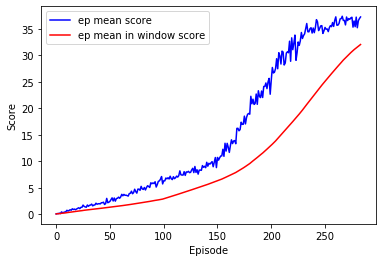

In [19]:
import matplotlib.pyplot as plt

plot_score_mean = []
plot_score_in_window = []
plot_score_in_window_que = deque(maxlen=args.scores_window_len)

for s in scores:
    plot_score_mean.append(np.mean(s))
    plot_score_in_window_que.append(np.mean(s))
    plot_score_in_window.append(np.mean(plot_score_in_window_que))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.arange(len(plot_score_mean)), plot_score_mean, color='b', label='ep mean score')
ax.plot(np.arange(len(plot_score_in_window)), plot_score_in_window, color='r', label='ep mean in window score')
ax.legend()
plt.ylabel('Score')
plt.xlabel('Episode')
plt.show()

In [20]:
# Now we can finish!
env.close()